In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from tensorflow.keras.utils import plot_model
from tensorflow import constant_initializer
import matplotlib.pyplot as plt
import json
import shutil
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
import sys
sys.path.append("../code/")
from model import PhasedSNForecastModel
out_steps = 10

In [3]:
def normalize(data):
    masked_data = np.ma.masked_where(data < 0, data)
    min_val = masked_data.min(axis=1)
    max_val = masked_data.max(axis=1)
    
    for i in range(masked_data.shape[1]):
        masked_data.data[:,i,:] = (masked_data.data[:,i,:] - min_val)/(max_val-min_val)
    
    return_data = masked_data.data
    return_data[masked_data.mask] = -1
    return return_data, min_val, max_val
    
def denormalize(data, min_val, max_val):
    masked_data = np.ma.masked_where(data < 0, data)
    
    for i in range(masked_data.shape[1]):
        masked_data.data[:,i,:] = (masked_data.data[:,i,:] * (max_val-min_val))  +  min_val
    
    return_data = masked_data.data
    return_data[masked_data.mask] = -1
    return return_data

In [4]:
data = np.load("../data/padded_x_train.npy")
len_data = data.shape[1]
data, data_min_val, data_max_val = normalize(data)
X_train, y_train = data[:,:-out_steps,:],  data[:,-out_steps:,:]

In [5]:
data_val = np.load("../data/padded_x_val.npy")
len_data = data_val.shape[1]
data_val, data_val_min_val, data_val_max_val = normalize(data_val)
X_val, y_val = data_val[:,:-out_steps,:],  data_val[:,-out_steps:,:]

In [6]:
inputs = X_train
outputs = y_train
inputs_val = X_val
outputs_val = y_val

In [7]:
#Tensorboard
shutil.rmtree("../data/training/logs",ignore_errors=True)
#Checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint("../data/training/model_checkpoints/checkpoint", monitor='val_loss', verbose=0, save_best_only=True)



In [8]:
MAX_EPOCHS=1000
max_models = 10
models = []
histories = []
for i in range(max_models):
    model = PhasedSNForecastModel(units=150, out_steps=out_steps,features = 3, dropout=0.7)
    losses = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
    model.compile(optimizer="rmsprop", loss=losses)
    
    tensorboard = tf.keras.callbacks.TensorBoard(f"../data/training/logs/bootstrap/model_{i}")
    early_stop = tf.keras.callbacks.EarlyStopping( monitor='val_loss', min_delta=1e-10, patience=10)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(f"../data/training/model_checkpoints_{i}/checkpoint", monitor='val_loss', verbose=0, save_best_only=True)

    
    callbacks = [tensorboard,checkpoint, early_stop]
    history = model.fit(inputs,outputs,
                    batch_size=300, 
                    epochs=MAX_EPOCHS, 
                    validation_data=(inputs_val,outputs_val), 
                    callbacks=callbacks)
    models.append(model)

Epoch 1/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.3937WARNING:tensorflow:From /home/camilo/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
11/11 [==============================] - 4s 387ms/step - loss: 0.2952 - val_loss: 0.2145
Epoch 2/1000
11/11 [==============================] - 3s 272ms/step - loss: 0.2418 - val_loss: 0.1748
Epoch 3/1000
11/11 [==============================] - 4s 320ms/step - loss: 0.2185 - val_loss: 0.1495
Epoch 4/1000
11/11 [==============================] - 4s 401ms/step - loss: 0.1994 - val_loss: 0.1217
Epoch 5/1000
11/11 [==============================] - 4s 395ms/step - loss: 0.1867 - val_loss: 0.1336
Epoch 6/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.1714 - val_loss: 0.1152
Epoch 7/1000
11/11 [===============

Epoch 75/1000
11/11 [==============================] - 4s 387ms/step - loss: 0.0630 - val_loss: 0.0612
Epoch 76/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.0626 - val_loss: 0.0609
Epoch 77/1000
11/11 [==============================] - 4s 387ms/step - loss: 0.0625 - val_loss: 0.0611
Epoch 78/1000
11/11 [==============================] - 4s 393ms/step - loss: 0.0616 - val_loss: 0.0592
Epoch 79/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.0617 - val_loss: 0.0597
Epoch 80/1000
11/11 [==============================] - 4s 387ms/step - loss: 0.0616 - val_loss: 0.0596
Epoch 81/1000
11/11 [==============================] - 4s 389ms/step - loss: 0.0613 - val_loss: 0.0605
Epoch 82/1000
11/11 [==============================] - 4s 390ms/step - loss: 0.0609 - val_loss: 0.0591
Epoch 83/1000
11/11 [==============================] - 4s 389ms/step - loss: 0.0609 - val_loss: 0.0587
Epoch 84/1000
11/11 [==============================] - 4s 388ms/step - lo

11/11 [==============================] - 4s 386ms/step - loss: 0.0722 - val_loss: 0.0678
Epoch 47/1000
11/11 [==============================] - 4s 380ms/step - loss: 0.0711 - val_loss: 0.0663
Epoch 48/1000
11/11 [==============================] - 4s 384ms/step - loss: 0.0703 - val_loss: 0.0648
Epoch 49/1000
11/11 [==============================] - 4s 386ms/step - loss: 0.0705 - val_loss: 0.0660
Epoch 50/1000
11/11 [==============================] - 4s 383ms/step - loss: 0.0694 - val_loss: 0.0647
Epoch 51/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.0692 - val_loss: 0.0641
Epoch 52/1000
11/11 [==============================] - 4s 387ms/step - loss: 0.0685 - val_loss: 0.0645
Epoch 53/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.0682 - val_loss: 0.0639
Epoch 54/1000
11/11 [==============================] - 4s 386ms/step - loss: 0.0679 - val_loss: 0.0642
Epoch 55/1000
11/11 [==============================] - 4s 386ms/step - loss: 0.0675 - v

11/11 [==============================] - 4s 379ms/step - loss: 0.0571 - val_loss: 0.0581
Epoch 126/1000
11/11 [==============================] - 4s 385ms/step - loss: 0.0571 - val_loss: 0.0590
Epoch 127/1000
11/11 [==============================] - 4s 385ms/step - loss: 0.0573 - val_loss: 0.0584
Epoch 128/1000
11/11 [==============================] - 4s 383ms/step - loss: 0.0572 - val_loss: 0.0595
Epoch 129/1000
11/11 [==============================] - 4s 382ms/step - loss: 0.0571 - val_loss: 0.0609
Epoch 130/1000
11/11 [==============================] - 4s 386ms/step - loss: 0.0572 - val_loss: 0.0598
Epoch 131/1000
11/11 [==============================] - 4s 383ms/step - loss: 0.0571 - val_loss: 0.0587
Epoch 132/1000
11/11 [==============================] - 4s 382ms/step - loss: 0.0568 - val_loss: 0.0591
Epoch 133/1000
11/11 [==============================] - 4s 384ms/step - loss: 0.0570 - val_loss: 0.0582
Epoch 134/1000
11/11 [==============================] - 4s 386ms/step - loss: 0

11/11 [==============================] - 4s 387ms/step - loss: 0.0628 - val_loss: 0.0604
Epoch 68/1000
11/11 [==============================] - 4s 382ms/step - loss: 0.0626 - val_loss: 0.0599
Epoch 69/1000
11/11 [==============================] - 4s 383ms/step - loss: 0.0624 - val_loss: 0.0607
Epoch 70/1000
11/11 [==============================] - 4s 382ms/step - loss: 0.0624 - val_loss: 0.0599
Epoch 71/1000
11/11 [==============================] - 4s 384ms/step - loss: 0.0627 - val_loss: 0.0601
Epoch 72/1000
11/11 [==============================] - 4s 383ms/step - loss: 0.0613 - val_loss: 0.0600
Epoch 73/1000
11/11 [==============================] - 4s 385ms/step - loss: 0.0617 - val_loss: 0.0599
Epoch 74/1000
11/11 [==============================] - 4s 382ms/step - loss: 0.0613 - val_loss: 0.0620
Epoch 75/1000
11/11 [==============================] - 4s 383ms/step - loss: 0.0606 - val_loss: 0.0600
Epoch 76/1000
11/11 [==============================] - 4s 386ms/step - loss: 0.0614 - v

11/11 [==============================] - 4s 388ms/step - loss: 0.0913 - val_loss: 0.0700
Epoch 28/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.0900 - val_loss: 0.0696
Epoch 29/1000
11/11 [==============================] - 4s 386ms/step - loss: 0.0874 - val_loss: 0.0724
Epoch 30/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.0859 - val_loss: 0.0719
Epoch 31/1000
11/11 [==============================] - 4s 386ms/step - loss: 0.0867 - val_loss: 0.0705
Epoch 32/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.0844 - val_loss: 0.0702
Epoch 33/1000
11/11 [==============================] - 4s 387ms/step - loss: 0.0837 - val_loss: 0.0703
Epoch 34/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.0825 - val_loss: 0.0686
Epoch 35/1000
11/11 [==============================] - 4s 389ms/step - loss: 0.0798 - val_loss: 0.0691
Epoch 36/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.0806 - v

11/11 [==============================] - 6s 537ms/step - loss: 0.3234 - val_loss: 0.2456
Epoch 2/1000
11/11 [==============================] - 4s 387ms/step - loss: 0.2771 - val_loss: 0.2182
Epoch 3/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.2505 - val_loss: 0.1947
Epoch 4/1000
11/11 [==============================] - 4s 391ms/step - loss: 0.2321 - val_loss: 0.1698
Epoch 5/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.2152 - val_loss: 0.1551
Epoch 6/1000
11/11 [==============================] - 4s 387ms/step - loss: 0.2006 - val_loss: 0.1439
Epoch 7/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.1899 - val_loss: 0.1352
Epoch 8/1000
11/11 [==============================] - 4s 387ms/step - loss: 0.1784 - val_loss: 0.1353
Epoch 9/1000
11/11 [==============================] - 4s 386ms/step - loss: 0.1687 - val_loss: 0.1229
Epoch 10/1000
11/11 [==============================] - 4s 385ms/step - loss: 0.1603 - val_loss:

Epoch 81/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.0600 - val_loss: 0.0591
Epoch 82/1000
11/11 [==============================] - 5s 409ms/step - loss: 0.0598 - val_loss: 0.0596
Epoch 83/1000
11/11 [==============================] - 4s 396ms/step - loss: 0.0594 - val_loss: 0.0596
Epoch 84/1000
11/11 [==============================] - 4s 392ms/step - loss: 0.0597 - val_loss: 0.0591
Epoch 85/1000
11/11 [==============================] - 4s 382ms/step - loss: 0.0595 - val_loss: 0.0601
Epoch 86/1000
11/11 [==============================] - 4s 383ms/step - loss: 0.0584 - val_loss: 0.0588
Epoch 87/1000
11/11 [==============================] - 4s 386ms/step - loss: 0.0600 - val_loss: 0.0599
Epoch 88/1000
11/11 [==============================] - 4s 385ms/step - loss: 0.0585 - val_loss: 0.0591
Epoch 89/1000
11/11 [==============================] - 4s 383ms/step - loss: 0.0590 - val_loss: 0.0588
Epoch 90/1000
11/11 [==============================] - 4s 386ms/step - lo

11/11 [==============================] - 4s 391ms/step - loss: 0.0678 - val_loss: 0.0638
Epoch 57/1000
11/11 [==============================] - 4s 390ms/step - loss: 0.0676 - val_loss: 0.0634
Epoch 58/1000
11/11 [==============================] - 4s 390ms/step - loss: 0.0672 - val_loss: 0.0641
Epoch 59/1000
11/11 [==============================] - 4s 389ms/step - loss: 0.0668 - val_loss: 0.0642
Epoch 60/1000
11/11 [==============================] - 4s 387ms/step - loss: 0.0664 - val_loss: 0.0638
Epoch 61/1000
11/11 [==============================] - 4s 390ms/step - loss: 0.0658 - val_loss: 0.0649
Epoch 62/1000
11/11 [==============================] - 4s 393ms/step - loss: 0.0648 - val_loss: 0.0629
Epoch 63/1000
11/11 [==============================] - 4s 390ms/step - loss: 0.0656 - val_loss: 0.0633
Epoch 64/1000
11/11 [==============================] - 4s 386ms/step - loss: 0.0645 - val_loss: 0.0629
Epoch 65/1000
11/11 [==============================] - 4s 392ms/step - loss: 0.0647 - v

11/11 [==============================] - 4s 392ms/step - loss: 0.1213 - val_loss: 0.0838
Epoch 15/1000
11/11 [==============================] - 4s 398ms/step - loss: 0.1169 - val_loss: 0.0824
Epoch 16/1000
11/11 [==============================] - 4s 387ms/step - loss: 0.1144 - val_loss: 0.0849
Epoch 17/1000
11/11 [==============================] - 4s 389ms/step - loss: 0.1117 - val_loss: 0.0795
Epoch 18/1000
11/11 [==============================] - 4s 391ms/step - loss: 0.1086 - val_loss: 0.0778
Epoch 19/1000
11/11 [==============================] - 4s 395ms/step - loss: 0.1055 - val_loss: 0.0760
Epoch 20/1000
11/11 [==============================] - 4s 390ms/step - loss: 0.1037 - val_loss: 0.0758
Epoch 21/1000
11/11 [==============================] - 4s 396ms/step - loss: 0.1010 - val_loss: 0.0757
Epoch 22/1000
11/11 [==============================] - 4s 391ms/step - loss: 0.0982 - val_loss: 0.0732
Epoch 23/1000
11/11 [==============================] - 4s 403ms/step - loss: 0.0974 - v

11/11 [==============================] - 4s 388ms/step - loss: 0.0592 - val_loss: 0.0617
Epoch 94/1000
11/11 [==============================] - 4s 385ms/step - loss: 0.0593 - val_loss: 0.0600
Epoch 95/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.0593 - val_loss: 0.0606
Epoch 96/1000
11/11 [==============================] - 4s 389ms/step - loss: 0.0594 - val_loss: 0.0610
Epoch 97/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.0592 - val_loss: 0.0607
Epoch 98/1000
11/11 [==============================] - 4s 386ms/step - loss: 0.0593 - val_loss: 0.0609
Epoch 99/1000
11/11 [==============================] - 4s 386ms/step - loss: 0.0590 - val_loss: 0.0603
Epoch 1/1000
11/11 [==============================] - 6s 549ms/step - loss: 0.3291 - val_loss: 0.2543
Epoch 2/1000
11/11 [==============================] - 4s 388ms/step - loss: 0.2709 - val_loss: 0.2134
Epoch 3/1000
11/11 [==============================] - 4s 394ms/step - loss: 0.2421 - val_

11/11 [==============================] - 7s 660ms/step - loss: 0.0626 - val_loss: 0.0618
Epoch 72/1000
11/11 [==============================] - 8s 682ms/step - loss: 0.0620 - val_loss: 0.0613
Epoch 73/1000
11/11 [==============================] - 7s 673ms/step - loss: 0.0619 - val_loss: 0.0624
Epoch 74/1000
11/11 [==============================] - 7s 681ms/step - loss: 0.0613 - val_loss: 0.0602
Epoch 75/1000
11/11 [==============================] - 8s 683ms/step - loss: 0.0612 - val_loss: 0.0606
Epoch 76/1000
11/11 [==============================] - 8s 691ms/step - loss: 0.0610 - val_loss: 0.0620
Epoch 77/1000
11/11 [==============================] - 8s 684ms/step - loss: 0.0602 - val_loss: 0.0603
Epoch 78/1000
11/11 [==============================] - 7s 665ms/step - loss: 0.0607 - val_loss: 0.0610
Epoch 79/1000
11/11 [==============================] - 8s 699ms/step - loss: 0.0603 - val_loss: 0.0602
Epoch 80/1000
11/11 [==============================] - 7s 678ms/step - loss: 0.0601 - v

11/11 [==============================] - 7s 673ms/step - loss: 0.0716 - val_loss: 0.0661
Epoch 49/1000
11/11 [==============================] - 8s 735ms/step - loss: 0.0701 - val_loss: 0.0658
Epoch 50/1000
11/11 [==============================] - 7s 665ms/step - loss: 0.0705 - val_loss: 0.0633
Epoch 51/1000
11/11 [==============================] - 8s 688ms/step - loss: 0.0698 - val_loss: 0.0632
Epoch 52/1000
11/11 [==============================] - 8s 687ms/step - loss: 0.0693 - val_loss: 0.0634
Epoch 53/1000
11/11 [==============================] - 7s 665ms/step - loss: 0.0690 - val_loss: 0.0632
Epoch 54/1000
11/11 [==============================] - 8s 684ms/step - loss: 0.0683 - val_loss: 0.0631
Epoch 55/1000
11/11 [==============================] - 8s 699ms/step - loss: 0.0680 - val_loss: 0.0626
Epoch 56/1000
11/11 [==============================] - 8s 686ms/step - loss: 0.0675 - val_loss: 0.0632
Epoch 57/1000
11/11 [==============================] - 7s 669ms/step - loss: 0.0670 - v

11/11 [==============================] - 8s 718ms/step - loss: 0.0854 - val_loss: 0.0702
Epoch 33/1000
11/11 [==============================] - 8s 700ms/step - loss: 0.0845 - val_loss: 0.0700
Epoch 34/1000
11/11 [==============================] - 8s 691ms/step - loss: 0.0830 - val_loss: 0.0699
Epoch 35/1000
11/11 [==============================] - 8s 724ms/step - loss: 0.0816 - val_loss: 0.0686
Epoch 36/1000
11/11 [==============================] - 7s 671ms/step - loss: 0.0811 - val_loss: 0.0685
Epoch 37/1000
11/11 [==============================] - 8s 726ms/step - loss: 0.0800 - val_loss: 0.0668
Epoch 38/1000
11/11 [==============================] - 8s 695ms/step - loss: 0.0784 - val_loss: 0.0671
Epoch 39/1000
11/11 [==============================] - 8s 702ms/step - loss: 0.0781 - val_loss: 0.0669
Epoch 40/1000
11/11 [==============================] - 8s 715ms/step - loss: 0.0772 - val_loss: 0.0678
Epoch 41/1000
11/11 [==============================] - 7s 643ms/step - loss: 0.0771 - v

11/11 [==============================] - 8s 710ms/step - loss: 0.0585 - val_loss: 0.0588


In [10]:
history_dict = history.history
json.dump(history_dict, open("../data/training/history_model.json", 'w'))

In [11]:
model.save_weights("../data/sn_model.h5")

In [25]:
data_test = np.load("../data/padded_x_val.npy")[:,:,:]
data_test, data_test_min_val, data_test_max_val = normalize(data_test)
X_test, y_test = data_test[:,:-out_steps,:], data_test[:,-out_steps:, :]

y_hat_train = []
dy_hat_train = []
dX_train = denormalize(X_train, data_min_val,data_max_val)
dy_train = denormalize(y_train, data_min_val,data_max_val)
for i,model in enumerate(models):
    #Doing inference on Train data
    y_hat_train.append(model.predict(X_train))
    #Denormalizing train
    dy_hat_train.append(denormalize(y_hat_train[i], data_min_val,data_max_val))

y_hat = []
dy_hat = []
dX_test = denormalize(X_test, data_test_min_val,data_test_max_val)
dy_test = denormalize(y_test,data_test_min_val,data_test_max_val)

for i,model in enumerate(models):
    # Doing inference on Test data
    y_hat.append(model.predict(X_test))
    # Denormalizing results
    dy_hat.append(denormalize(y_hat[i],data_test_min_val,data_test_max_val))
    
dy_hat  = np.stack(dy_hat)
dy_means = dy_hat.mean(axis=0)
dy_vars = dy_hat.var(axis=0)

y_hat  = np.stack(y_hat)
y_means = y_hat.mean(axis=0)
y_vars = y_hat.var(axis=0)


dy_hat  = np.stack(dy_hat)
dy_means = dy_hat.mean(axis=0)
dy_vars = dy_hat.var(axis=0)

y_hat_train  = np.stack(y_hat_train)
y_means_train = y_hat_train.mean(axis=0)
y_vars_train = y_hat_train.var(axis=0)

dy_hat_train  = np.stack(dy_hat_train)
dy_means_train = dy_hat_train.mean(axis=0)
dy_vars_train = dy_hat_train.var(axis=0)

In [26]:
# Plotting results
features = ["Time", "Mag", "Error"]

In [27]:
maes_test = {}
for i, title in enumerate(features):
    maes_test[title] = []
    for t in range(out_steps):
        maes_test[title].append(mean_absolute_error(y_test[:,t,i], y_means[:,t,i]))

In [30]:
maes_train = {}
for i, title in enumerate(features):
    maes_train[title] = []
    for t in range(out_steps):
        maes_train[title].append(mean_absolute_error(y_train[:,t,i], y_means_train[:,t,i]))

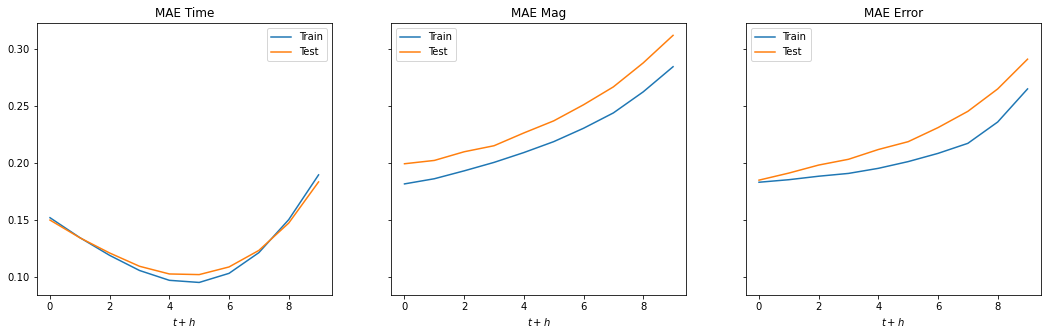

In [31]:
fig,axes = plt.subplots(1,len(features), figsize=(6*len(features),5),sharey=True) 
for i, title in enumerate(features):
    axes[i].plot(maes_train[title], label="Train")
    axes[i].plot(maes_test[title], label="Test")

    axes[i].set_title(f"MAE {title}")
    axes[i].set_xlabel("$t+h$")
    axes[i].legend()

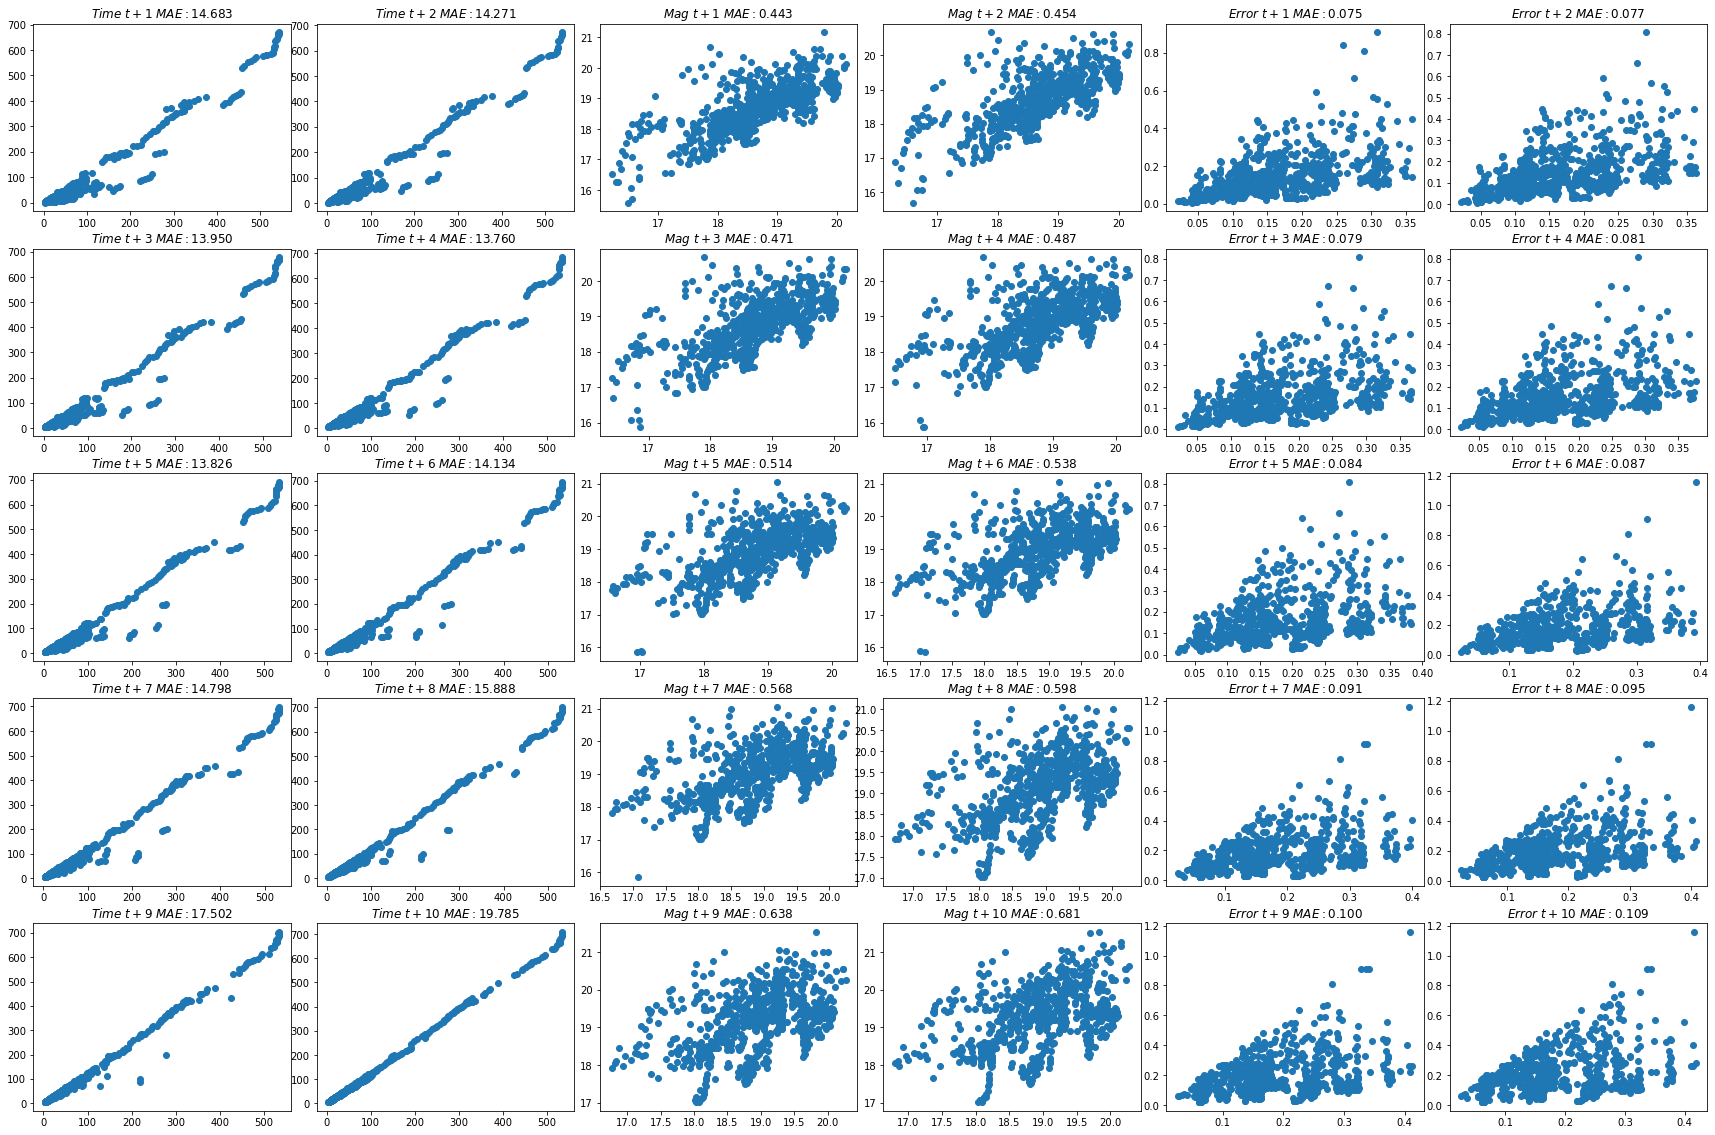

In [32]:
all_rows = np.ceil(out_steps/2).astype(int)
all_columns = len(features)*2
fig2 = plt.figure(figsize=(all_columns*5, all_rows*4))
grid = plt.GridSpec(all_rows, all_columns , wspace=0.1, hspace=0.2)
for i, title in enumerate(features):    
    for t in range(out_steps):
        column = 2*i + (t%2)
        row = t // 2
        
        ax = plt.subplot(grid[row,column])
        mae = mean_absolute_error(dy_test[:,t,i], dy_means[:,t,i])
        ax.set_title(f"${title} \ t+{t+1} \ MAE:{mae:.3f}$")
        ax.scatter(dy_means[:,t,i].flatten(),dy_test[:,t,i].flatten())
plt.show()

In [31]:
def plot_data(x, y_real, y_hat, sample=0):
    plt.gca().invert_yaxis()
    x_masked = np.ma.masked_where(x < 0, x)
    plt.scatter(x_masked[sample,:,0], x_masked[sample,:,1], label="History")
    plt.scatter(y_real[sample,:,0], y_real[sample,:,1], label="Real")
    plt.scatter(y_hat[sample,:,0], y_hat[sample,:,1], label="Prediction")
    plt.xlabel("Time $mjd-\min(mjd)$")
    plt.ylabel("Mag")
    
    
f = lambda sample: plot_data(dX_test, dy_test, dy_hat,sample=sample)
interact(f, sample=(0,len(dX_test)-1))

interactive(children=(IntSlider(value=397, description='sample', max=795), Output()), _dom_classes=('widget-in…

<function __main__.<lambda>(sample)>

In [34]:
model.denses

[<tf.Variable 'phased_sn_forecast_model/dense_3/kernel:0' shape=(9, 3) dtype=float32, numpy=
 array([[-0.26564014, -0.3668615 , -0.18176034],
        [ 0.5643201 , -0.35877514, -0.21923216],
        [-0.7703384 ,  0.20789187,  0.01628134],
        [-0.14121704, -0.14024428, -0.06945106],
        [ 0.08566386,  0.39288557,  0.21933383],
        [ 0.20631957,  0.4798638 ,  0.29290858],
        [-0.32887232, -0.13955706, -0.04128879],
        [-0.10532368, -0.15476869, -0.08101232],
        [ 0.59834254, -0.17563158, -0.1160365 ]], dtype=float32)>,
 <tf.Variable 'phased_sn_forecast_model/dense_3/bias:0' shape=(3,) dtype=float32, numpy=array([0.6676425 , 0.4047749 , 0.28410244], dtype=float32)>]